### Comensais do Restaurante Universitário da Universidade Federal do Ceará (RU-UFC)

#### Carregamento das Variáveis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

students_users = pd.DataFrame(pd.read_csv("estudantes-comensais.csv"))

meals_counters = pd.DataFrame({"amounts": { #contagem das refeições
    "desjejum": len(students_users[students_users["tipo_refeicao"] == "Café da Manhã"]),
    "almoço": len(students_users[students_users["tipo_refeicao"] == "Almoço"]),
    "jantar": len(students_users[students_users["tipo_refeicao"] == "Jantar"]),
}})

users_grouped = students_users[["vinculo_comensal", "quantidade_refeicao"]].groupby(by="vinculo_comensal").sum() #agrupador por vínculo
users_type = users_grouped.rename(index={"AUXILIO_CONCLUDENTE": "Auxílio Concludente", "AUXILIO_MORADIA": "Auxílio Moradia", "DISCENTE": "Discentes", "ISENCAO_INGRESSANTE": "Ingressantes Isentos", "ISENCAO_PARCIAL": "Isentos Parciais", "ISENCAO_TOTAL": "Isentos Totais", "RESIDENTE": "Residentes"}) #renomeador de índices (rótulos)

students_users_origins = students_users[["uf_naturalidade", "quantidade_refeicao"]].groupby(by="uf_naturalidade").sum()

### Informações sobre a Frequência de Comensais

#### Quanto à nacionalidade

#### Por Quantidade de Pessoas

In [10]:
students_users_nationality = students_users[students_users["tipo_nacionalidade"] == "Estrangeiro"]
countries_counter = students_users_nationality[["pais_nacionalidade"]].groupby(by="pais_nacionalidade").value_counts()

foreign_countries = students_users_nationality[["pais_nacionalidade", "quantidade_refeicao"]].groupby(by="pais_nacionalidade").sum()
foreign_countries["quantidade_pessoas"] = len(students_users_nationality)

foreigners_data = foreign_countries.merge(countries_counter, on="pais_nacionalidade").drop("quantidade_pessoas", axis=1).rename({"count":"quantidade_pessoas"}, axis=1)
display(foreigners_data)

,quantidade_refeicao,quantidade_pessoas
pais_nacionalidade,,
ANGOLANA,1203,24
BENINENSE,2,1
CABO-VERDIANA,2508,55
CONGOLESA,325,5
GABONESA,456,8
GANENSE,113,4
GUINEENSE,1673,34
HAITIANA,316,7
JAMAICANA,2,2


#### Quanto à etnia

In [11]:
students_users_race = students_users[["raca_etnia", "quantidade_refeicao"]].groupby(by="raca_etnia").sum()
display(students_users_race)

,quantidade_refeicao
raca_etnia,
Amarela,14808
Branca,726671
Indígena,8394
Parda,1002916
Preta,143908
quilombola,3031


#### Plotagem de Gráficos

##### Comensais do Restaurante Universitário por Vínculo

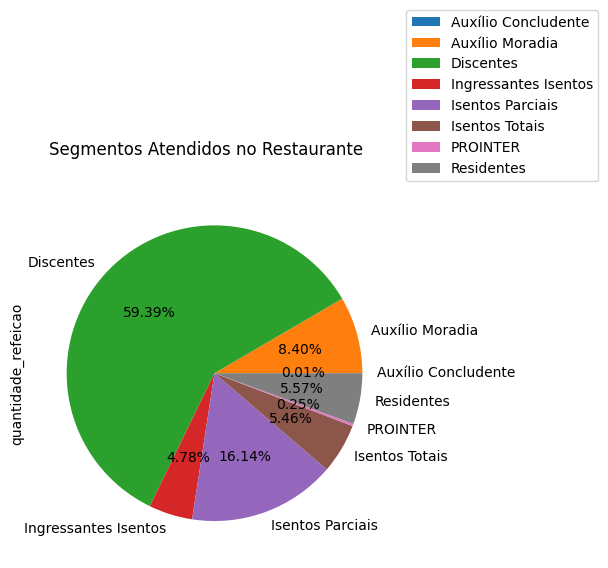

In [12]:
users_type.plot(kind="pie", title="Segmentos Atendidos no Restaurante", subplots=True, autopct="%.2f%%")
plt.legend(loc="lower left", bbox_to_anchor=(1, 1))
plt.show()

#### Contagem das Refeições por Tipo

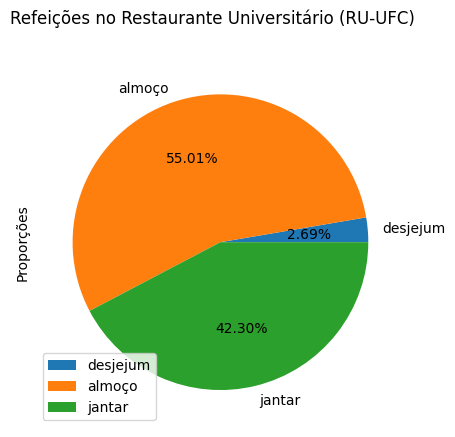

In [13]:
meals_counters.plot(kind="pie", title="Refeições no Restaurante Universitário (RU-UFC)", subplots=True, ylabel="Proporções", autopct="%.2f%%")
plt.show()

### Proporção de Comensais por Unidade Federativa

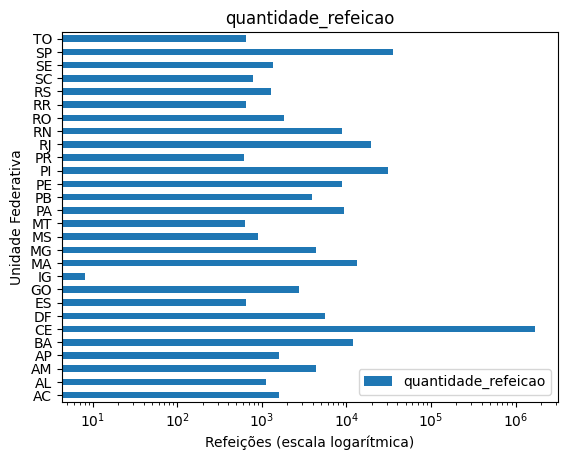

In [14]:
students_users_origins.plot(kind="barh",subplots=True, ylabel="Unidade Federativa", xlabel="Refeições (escala logarítmica)", logx=True)
plt.show()